NameError: name 'sobel' is not defined

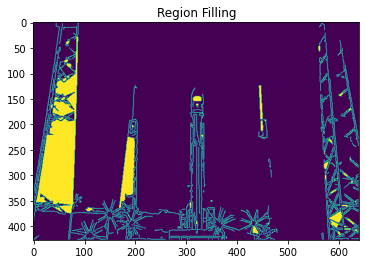

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from skimage.feature import canny

from skimage import data,morphology

from skimage.color import rgb2gray

import scipy.ndimage as nd

plt.rcParams["figure.figsize"] = (12,8)

%matplotlib inline

# load images and convert grayscale

rocket = data.rocket()

rocket_wh = rgb2gray(rocket)

# apply edge segmentation
# plot canny edge detection

edges = canny(rocket_wh)

plt.imshow(edges, interpolation='gaussian')

plt.title('Canny detector')

# fill regions to perform edge segmentation

fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)

plt.title('Region Filling')

# Region Segmentation
# First we print the elevation map

elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)

# Since, the contrast difference is not much. Anyways we will perform it

markers = np.zeros_like(rocket_wh)

markers[rocket_wh < 0.1171875] = 1 # 30/255

markers[rocket_wh > 0.5859375] = 2 # 150/255

plt.imshow(markers)

plt.title('markers')

# Perform watershed region segmentation

segmentation = morphology.watershed(elevation_map, markers)

plt.imshow(segmentation)

plt.title('Watershed segmentation')

# plot overlays and contour

segmentation = nd.binary_fill_holes(segmentation - 1)

label_rock, _ = nd.label(segmentation)
# overlay image with different labels

image_label_overlay = label2rgb(label_rock, image=rocket_wh)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)

ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)


fig.subplots_adjust(**margins)

In [ ]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


Frames extracted from the GIF file.


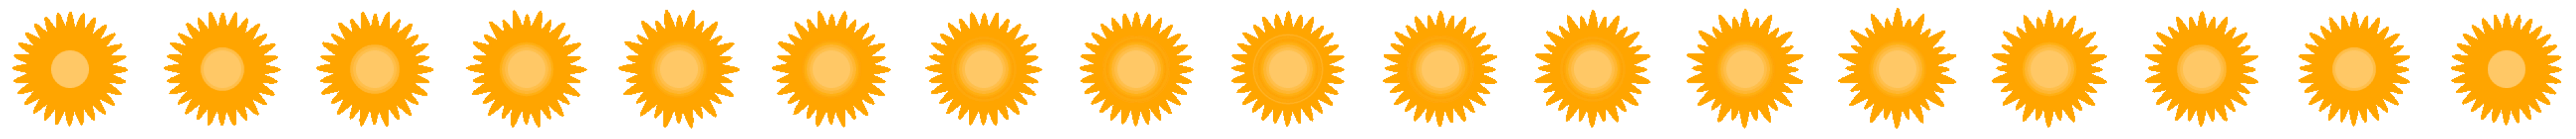

In [ ]:
#Program to read an image from graphics file
import matplotlib.pyplot as plt
from PIL import Image

def extract_frames_from_gif(file_path):
    try:
        # Open the GIF file
        gif = Image.open(file_path)

        # Extract frames
        frames = []
        while True:
            try:
                frames.append(gif.copy())
                gif.seek(gif.tell() + 1)
            except EOFError:
                break

        return frames
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Display frames using matplotlib
def display_frames(frames):
    num_frames = len(frames)
    fig, axes = plt.subplots(1, num_frames, figsize=(num_frames * 3, 3))

    for i, frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].axis('off')

    plt.show()

# Example usage
if __name__ == "__main__":
    file_path = "sun.gif"  # Replace with the path to your GIF image file
    frames = extract_frames_from_gif(file_path)
    if frames:
        print("Frames extracted from the GIF file.")
        display_frames(frames)
    else:
        print("Failed to extract frames from the GIF file.")


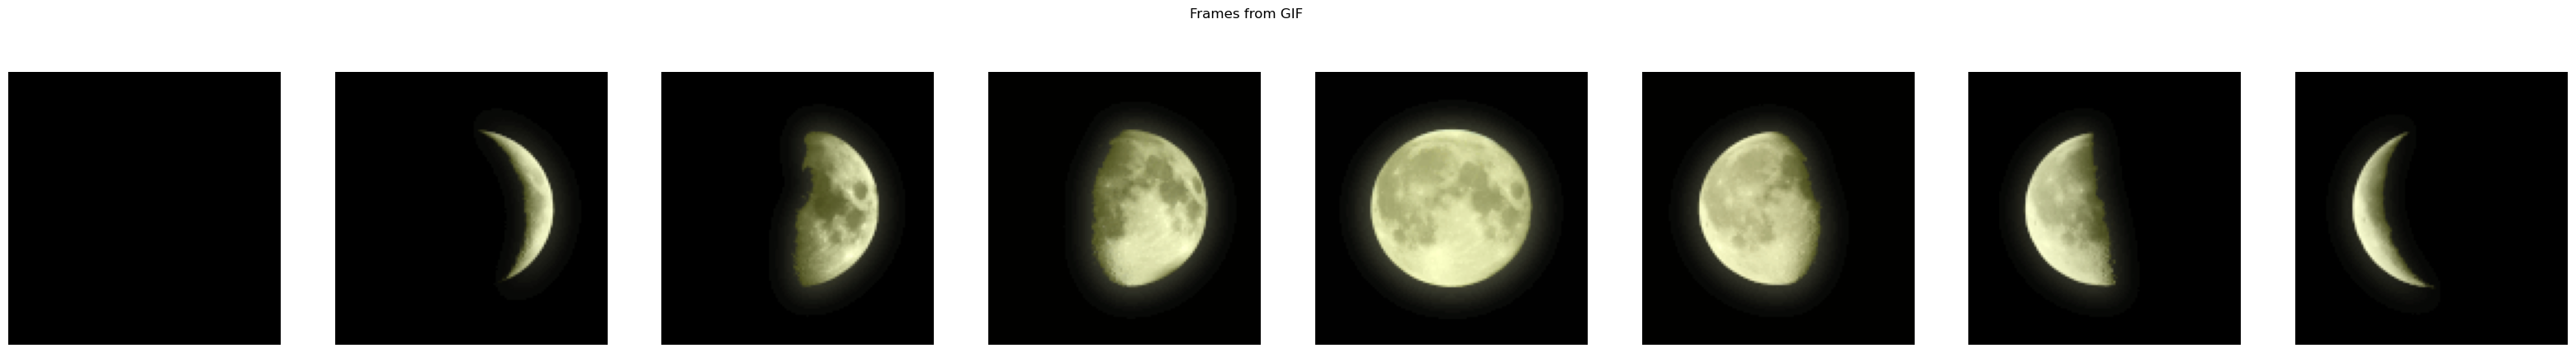

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

def extract_and_display_frames(gif_path):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Display each frame
    num_frames = len(gif)
    plt.figure(figsize=(5*num_frames, 5))  # Adjust the figure size as needed
    plt.suptitle('Frames from GIF')

    for i, frame in enumerate(gif):
        plt.subplot(1, num_frames, i + 1)  # Create subplot

        # Check the color mode of the frame
        if frame.ndim == 2:
            # Grayscale frame
            plt.imshow(frame, cmap='gray', extent=[0, 5, 0, 5])  # Display as grayscale
        else:
            # Color frame
            if frame.shape[2] == 4:
                # If alpha channel exists, remove it
                frame = frame[:, :, :3]
            plt.imshow(frame, extent=[0, 5, 0, 5])  # Display with original colors
        v
        plt.axis('off')

    plt.show()

gif_path = "moon.gif"
extract_and_display_frames(gif_path)


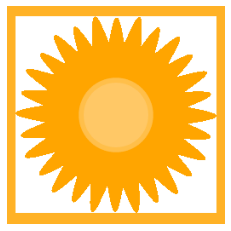

In [ ]:
import imageio
import matplotlib.pyplot as plt

def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)
    gif_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the specific frame
    frame = gif.get_data(frame_index)

    # Display the frame
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

gif_path = "sun.gif"  # Replace with the path to your GIF file
frame_index = 1  # Index of the frame you want to display
display_frame(gif_path, frame_index)

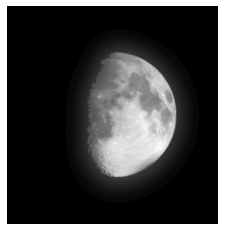

In [ ]:
import imageio
import matplotlib.pyplot as plt
import cv2
def bgr_to_rgb(image):
    # Convert BGR image to RGB format
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)
    # Read the specific frame
    frame_bgr = gif.get_data(frame_index)
    # Convert BGR to RGB
    frame_rgb = bgr_to_rgb(frame_bgr)
    # Display the frame
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
gif_path = "moon.gif"
frame_index = 3  # Index of the frame you want to display
display_frame(gif_path, frame_index)

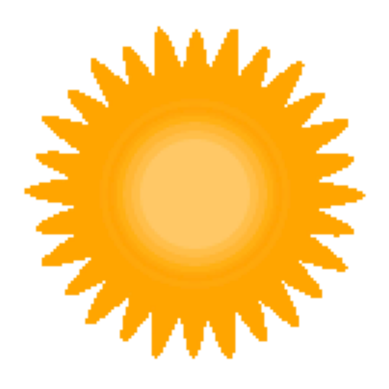

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def read_image_frame(file_path, frame_index):
    try:
        # Open the image file
        img = Image.open(file_path)

        # If it's a GIF file, navigate to the specified frame
        if img.format == 'GIF':
            img.seek(frame_index)

        return img
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Display image using matplotlib
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    file_path = "sun.gif"  # Replace with the path to your image file
    frame_index = 6  # Index of the frame you want to display
    image_frame = read_image_frame(file_path, frame_index)
    if image_frame:
        display_image(image_frame)
    else:
        print("Failed to read the image frame.")


Indexed Image


C:\Users\CCL\AppData\Local\Temp\ipykernel_4132\1441976730.py:10: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  indexed_img = binary_img.convert("P", palette=Image.ADAPTIVE)


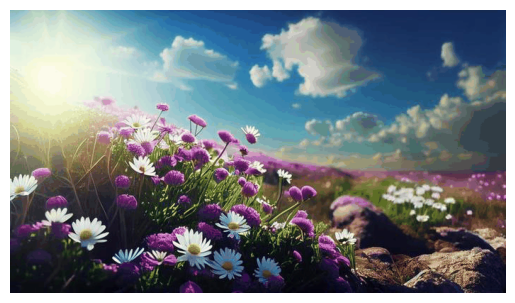

Binary Image


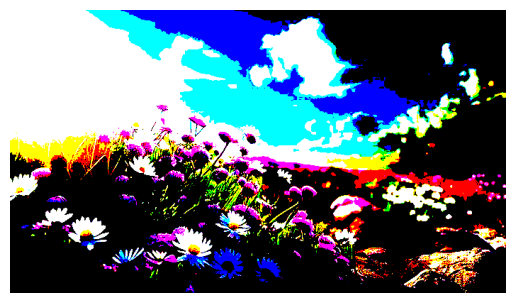

In [ ]:
#Program to convert binary image to indexed image and vice versa
import matplotlib.pyplot as plt
from PIL import Image

def binary_to_indexed(binary_img_path):
    # Open binary image
    binary_img = Image.open(binary_img_path)

    # Convert binary image to indexed image
    indexed_img = binary_img.convert("P", palette=Image.ADAPTIVE)

    return indexed_img

def indexed_to_binary(indexed_img_path, threshold=128):
    # Open indexed image
    indexed_img = Image.open(indexed_img_path)

    # Convert indexed image to binary image
    binary_img = indexed_img.point(lambda p: p > threshold and 255)

    return binary_img

# Display image using Matplotlib
def display_image(image):
    plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Convert binary image to indexed image
    print("Indexed Image")
    indexed_img = binary_to_indexed("flower.jpeg")

    # Display indexed image
    display_image(indexed_img)

    # Convert indexed image back to binary image
    print("Binary Image")
    binary_img = indexed_to_binary("flower.jpeg")

    # Display binary image
    display_image(binary_img)

In [ ]:
import numpy as np
def binary_to_indexed(binary_image):
    # Create an indexed image array
    indexed_image = np.zeros_like(binary_image, dtype=np.uint8)

    # Assign index 0 to black pixels and index 1 to white pixels
    indexed_image[binary_image == 0] = 0
    indexed_image[binary_image == 255] = 1

    return indexed_image

def indexed_to_binary(indexed_image, threshold=0.5):
    # Create a binary image array
    binary_image = np.zeros_like(indexed_image, dtype=np.uint8)

    # Set pixels with index <= threshold to black (0), and > threshold to white (255)
    binary_image[indexed_image <= threshold] = 0
    binary_image[indexed_image > threshold] = 255

    return binary_image

# Example binary image (replace this with your own binary image)
binary_image = np.array([[0, 255, 0],
                         [255, 255, 255],
                         [0, 0, 0]], dtype=np.uint8)

# Convert binary image to indexed image
indexed_image = binary_to_indexed(binary_image)

# Convert indexed image to binary image
restored_binary_image = indexed_to_binary(indexed_image)

# Display the results
print("Original Binary Image:")
print(binary_image)
print("\nIndexed Image:")
print(indexed_image)
print("\nRestored Binary Image:")
print(restored_binary_image)

Original Binary Image:
[[  0 255   0]
 [255 255 255]
 [  0   0   0]]

Indexed Image:
[[0 1 0]
 [1 1 1]
 [0 0 0]]

Restored Binary Image:
[[  0 255   0]
 [255 255 255]
 [  0   0   0]]
